In [1]:
# # Mount GDrive
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

#from tensorflow.keras.models import Sequential, Model
#from tensorflow.keras import layers, optimizers, callbacks

#from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50

import matplotlib.pyplot as plt

#Put Colab in the context of this challenge
import os

In [4]:
df_masked = pd.read_csv('../df_masked.csv')
df_masked.head(5)

,Unnamed: 0,index,Id,Lon,Lat,Country,State,LGA,Ward,Population,...,Customers,Renewable energy share,Generator capacity (kw),PV size(kW),Battery capacity (kWh),Demand,Electr_type_phase_1,Electr_type_phase_2,Electr_type_phase_3,Distance_m
0,1654,146,40733,4.742796,13.004795,Nigeria,Sokoto,Silame,MARAFA WEST,2995.618570,...,611,66.9,194,196,448,279,none,grid,grid,3870
1,954,250,38729,8.794116,9.100529,Nigeria,Plateau,Bokkos,TOFF,2993.034276,...,565,71.9,151,160,352,209,none,mini-grid,intercon,36750
2,1139,435,39400,9.598031,8.457592,Nigeria,Plateau,Shendam,AZARA,2993.034276,...,565,70.8,147,188,392,210,mini-grid,mini-grid,intercon,37260
3,1338,90,34201,4.450469,6.988445,Nigeria,Ogun,Ijebu East,OSUN,2982.547845,...,497,68.0,124,136,312,178,none,none,grid,41620
4,92,92,10451,9.020765,6.159864,Nigeria,Cross River,Boki,ABO,2982.404980,...,877,66.2,261,326,664,361,none,mini-grid,intercon,20970


In [9]:
from os import walk

data_path = './data/initial_set'

f = []
for (dirpath, dirnames, filenames) in walk(data_path):
    f.extend(filenames)
    break

In [10]:
images_ids = []
for id in filenames:
  id = int(id[0:5])
  images_ids.append(id)

images_ids

[10889,
 10645,
 39599,
 41344,
 10679,
 34526,
 41807,
 41813,
 34532,
 38446,
 31310,
 38452,
 38334,
 31476,
 10321,
 32802,
 41152,
 31502,
 41032,
 41026,
 38283,
 32553,
 10902,
 33103,
 10916,
 34693,
 38903,
 40660,
 40890,
 34877,
 40649,
 40891,
 10718,
 41219,
 31926,
 38916,
 33843,
 34692,
 10917,
 38731,
 34645,
 10526,
 10240,
 32778,
 34453,
 38269,
 41153,
 38453,
 34269,
 31463,
 33512,
 39771,
 34533,
 31339,
 39765,
 10644,
 38876,
 40701,
 31675,
 10863,
 34719,
 10877,
 33738,
 38679,
 10849,
 10691,
 31887,
 38653,
 31663,
 40717,
 41347,
 38684,
 32626,
 38479,
 38337,
 39997,
 31307,
 38445,
 10322,
 41179,
 10478,
 10295,
 39175,
 38243,
 38531,
 41019,
 40461,
 10256,
 10242,
 32961,
 40449,
 39363,
 34653,
 34135,
 39439,
 10915,
 10901,
 41596,
 34690,
 38914,
 40677,
 40887,
 41227,
 38928,
 40892,
 10727,
 41568,
 34108,
 41583,
 10914,
 33115,
 40448,
 38295,
 41030,
 39821,
 34493,
 40460,
 41795,
 38242,
 33471,
 35028,
 34450,
 38487,
 41144,
 41150,


In [11]:
#filenames[0:10]

In [13]:
#df_masked[df_masked['Id'] == 10321].Demand.values[0]

In [14]:
#images_ids[0]

In [15]:
y = []
for id in images_ids:
  print(id)
  y.append(df_masked[df_masked['Id'] == id].Demand.values[0])

10889
10645
39599
41344
10679
34526
41807
41813
34532
38446
31310
38452
38334
31476
10321
32802
41152
31502
41032
41026
38283
32553
10902
33103
10916
34693
38903
40660
40890
34877
40649
40891
10718
41219
31926
38916
33843
34692
10917
38731
34645
10526
10240
32778
34453
38269
41153
38453
34269
31463
33512
39771
34533
31339
39765
10644
38876
40701
31675
10863
34719
10877
33738
38679
10849
10691
31887
38653
31663
40717
41347
38684
32626
38479
38337
39997
31307
38445
10322
41179
10478
10295
39175
38243
38531
41019
40461
10256
10242
32961
40449
39363
34653
34135
39439
10915
10901
41596
34690
38914
40677
40887
41227
38928
40892
10727
41568
34108
41583
10914
33115
40448
38295
41030
39821
34493
40460
41795
38242
33471
35028
34450
38487
41144
41150
10451
38322
38478
41805
34530
34915
34097
31662
10690
41395
38656
39548
34044
40706
31699
38454
41197
32623
10482
39004
41140
39158
32019
38534
38285
34497
31712
33105
39400
40869
34656
10938
38911
10723
31935
10722
38904
41579
40897
41223
40868
3412

In [16]:
#y = list(df_masked.Demand)
#y
len(y)

1152

In [50]:
def load_sattelite_images(data_path, data_folder, y):
        
    data_path = data_path
    #y = np.array([279, 209, 210, 178, 361, 231, 207, 196, 190, 202])
    y = np.array(y)
    imgs = []
    images_path = [os.path.join(data_path, elt) for elt in os.listdir(os.path.join(data_path)) if elt.find('.png')>0]
    #print(images_path)
    for path in images_path:
        if os.path.exists(path):
            image = Image.open(path)
             #image = image.resize((256, 256))
            imgs.append(np.array(image))

    X = np.array(imgs)
    print(X.shape)

    first_split = int(len(imgs) * .6)
    second_split = first_split + int(len(imgs) * 0.2)
    X_train, X_val, X_test = X[:first_split], X[first_split:second_split], X[second_split:]
    y_train, y_val, y_test = y[:first_split], y[first_split:second_split], y[second_split:]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [51]:
pwd

'/Users/karimelbana/SolarOdyssey/rrep-nigeria'

In [52]:
#import os 
#os.chdir("drive/MyDrive/SolarOdyssey/rrep_nigeria/data")

In [53]:
data_path = 'data/initial_set'
data_folder = 'initial_set'
X_train, y_train, X_val, y_val, X_test, y_test = load_sattelite_images(data_path, data_folder, y)
print(X_train.shape, X_val.shape, X_test.shape)

(1152, 512, 512, 3)
(691, 512, 512, 3) (230, 512, 512, 3) (231, 512, 512, 3)


In [54]:
X_train.shape, np.array(y_train).shape, X_val.shape, np.array(y_val).shape, X_test.shape, np.array(y_test).shape

((691, 512, 512, 3),
 (691,),
 (230, 512, 512, 3),
 (230,),
 (231, 512, 512, 3),
 (231,))

In [55]:
#y_train

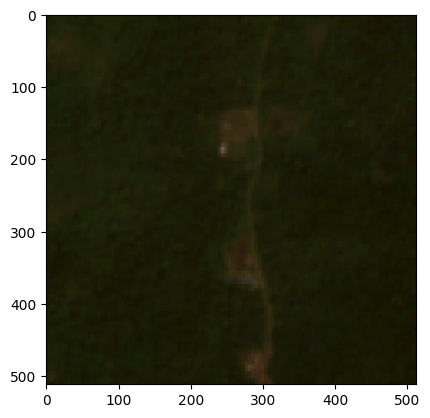

In [56]:
plt.imshow(X_train[0])

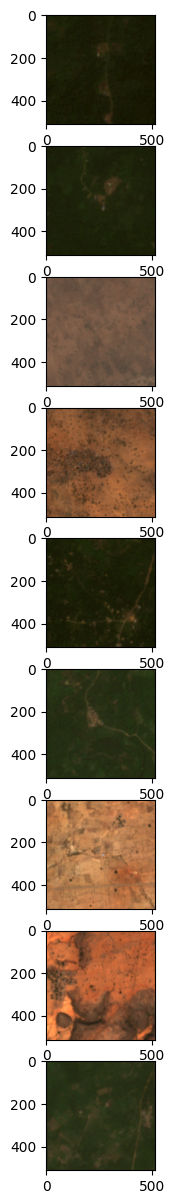

In [57]:
#plot images
plt.figure(figsize=(20,15))
for i in range(9):
  #for j in range(3):
    #plt.subplot(9,3, j+1 + 3*i)
    #plt.imshow(X_train[i])
    plt.subplot(9,1, i+1)
    plt.imshow(X_train[i])

In [58]:
# #plot images
# plt.figure(figsize=(20,15))
# for i in range(9):
#     plt.subplot(3,3, i+1)
#     plt.imshow(X_train[i])

In [59]:
# #plot images
# plt.figure(figsize=(20,15))
# for i in range(2):
#   for j in range(2):
#     plt.subplot(8,2,j+2*i+1)
#     plt.imshow(X_train[i][:,:,j], cmap='gray')

In [60]:
# def reshape(list):
#   new_list = []
#   for item in list:
#     item = 
#     new_list.append(item)

#   return new_list

# X_train = reshape(X_train)
# X_val = reshape(X_val)
# X_test = reshape(X_test)

In [61]:
X_train[0].shape

(512, 512, 3)

In [64]:
#load model
def load_model(model_selected):

    model = Sequential()

    if model_selected == 'vgg16':
        model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    elif model_selected == 'resnet50':
        model = ResNet50(weights='imagenet', include_top = False, input_shape=X_train[0].shape)
    
    return model

In [68]:
def set_nontrainable_layers(model):
    
    # Set the first layers to be untrainable
    model.trainable = False

    return model

In [69]:
def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    base_model = set_nontrainable_layers(model)    
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(100, activation='relu')
    prediction_layer = layers.Dense(1, activation='linear')
    
    model_w_layers = models.Sequential([
        model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
  
    return model_w_layers

In [70]:
def build_model(model_selected):
  
  model = load_model(model_selected)
    
  model_full = add_last_layers(model)
    
  #opt = optimizers.Adam(learning_rate=1e-4)

  model_full.compile(loss="mse", optimizer='adam', metrics='mse')
    
  return model_full

In [71]:
#Preprocess to match VGG16
X_train = preprocess_input(X_train) 
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [72]:
#Preprocess to match resnet50

#from tensorflow.keras.applications.resnet50 import preprocess_input as preproc_res

# X_train = preproc_res(X_train) 
# X_val = preproc_res(X_val)
# X_test = preproc_res(X_test)

In [73]:
model = Sequential()

#model = load_model('vgg16')
#model.summary()

In [74]:
model_built = build_model('vgg16')
model_built.summary()

es = EarlyStopping(monitor = 'val_loss', 
                   patience = 10, 
                   verbose = 1, 
                   restore_best_weights = True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 16, 16, 512)       14714688  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 100)               13107300  
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 27,822,089
Trainable params: 13,107,401
Non-trainable params: 14,714,688
_________________________________________________________________


In [75]:
#model_built.loss

In [76]:
#y_val

In [ ]:
history = model_built.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, callbacks=[es])

In [ ]:
history.history

{'loss': [36719.55078125,
  8337.2978515625,
  8522.955078125,
  1403.4173583984375,
  1994.6375732421875,
  2051.4140625,
  330.2071838378906,
  135.98281860351562,
  129.2735137939453,
  160.33724975585938,
  77.3999252319336,
  51.192840576171875,
  78.76077270507812,
  133.07174682617188,
  11.509093284606934,
  87.23123931884766],
 'mse': [36719.55078125,
  8337.2978515625,
  8522.955078125,
  1403.4173583984375,
  1994.6375732421875,
  2051.4140625,
  330.2071838378906,
  135.98281860351562,
  129.2735137939453,
  160.33724975585938,
  77.3999252319336,
  51.192840576171875,
  78.76077270507812,
  133.07174682617188,
  11.509093284606934,
  87.23123931884766],
 'val_loss': [831.1284790039062,
  7318.6240234375,
  3390.648193359375,
  303.648193359375,
  1097.3468017578125,
  647.0031127929688,
  281.84063720703125,
  388.497802734375,
  342.7603454589844,
  312.82476806640625,
  273.7745361328125,
  279.1624450683594,
  327.2934265136719,
  312.882568359375,
  280.2222595214844,


In [ ]:
print(model_built.evaluate(X_test, y_test, verbose=1))

1/1 [==============================] - 0s 233ms/step - loss: 1999.8970 - mse: 1999.8970
[1999.89697265625, 1999.89697265625]


In [ ]:
test = np.expand_dims(X_test[1], axis=0)

In [ ]:
test.shape

(1, 256, 256, 3)

In [ ]:
model_built.predict(test)

1/1 [==============================] - 0s 24ms/step


array([[157.56335]], dtype=float32)

In [ ]:
X_train.shape

(6, 256, 256, 3)

In [ ]:
X_val.shape

(2, 256, 256, 3)

In [ ]:
# def predictImage(url, model):
  
#   # Takes an imafe and a model
  
#   img = getImage(url)
#   img = img_to_array(img)
#   img = img.reshape((-1, 150, 150, 3))
#   res = model.predict(img)[0][0]
#   if(res < 0.5):
#     animal = "cat"
#     prob = 1-res
#   if(res >= 0.5):
#     animal = "dog"
#     prob = res
    
#   print("Animal : ", animal)
#   print("probability = ",prob)

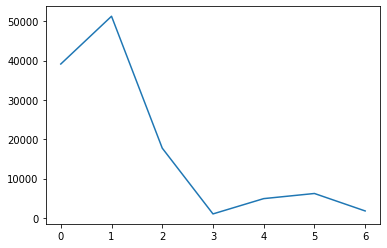

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

1/1 [==============================] - 1s 985ms/step - loss: 38908.8164
38908.81640625


In [ ]:
res_vgg = model_built.evaluate(X_test, y_test)

test_accuracy_vgg = res_vgg[-1]

print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy = {round(test_accurcy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')

1/1 [==============================] - 0s 80ms/step - loss: 2848.9688 - mse: 2848.9688
test_accuracy_vgg = 284897.0 %


NameError: ignored

In [ ]:
# #ternausnet
# pip install torch torchvision
# pip install opencv-python
# pip install ternausnet

In [ ]:
# %matplotlib inline
# from pylab import *
# #from skimage.morphology import watershed
# import scipy.ndimage as ndimage
# from PIL import Image, ImagePalette

# from torch.nn import functional as F
# from torchvision.transforms import ToTensor, Normalize, Compose
# import torch

# import tifffile as tiff
# import cv2
# import random
# from pathlib import Path

#from models.ternausnet2 import TernausNetV2